In [1]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from natsort import natsorted

In [3]:
# Set the path to the directory containing the image stacks
stack_dir = 'C:/Users/au519867/OneDrive - Aarhus universitet/Skrivebord/Raw_Images/RAW_Stacks/Threshold'

# Get a list of all TIFF files in the input directory
files = [f for f in os.listdir(stack_dir) if f.endswith('.tiff')]
print(files)

green_stack = tifffile.imread(os.path.join(stack_dir, files[0]))
red_stack = tifffile.imread(os.path.join(stack_dir, files[1]))

#Get length of image stacks
num_images_green = len(green_stack)
num_images_red = len(red_stack)
if num_images_green == num_images_red:
    print("Equal stacks")
    num_images = num_images_green
else:
    print("unequal stacks")

print("stack=",num_images)

['thresholded_500_stacked_green_channel.tiff', 'thresholded_500_stacked_red_channel.tiff']
Equal stacks
stack= 17


In [4]:
# Loop through all red/green pairs of images in the stacks an get the RED/GREEN intensity ratio
red_green_ratio = []
for i in range(num_images):

    # Calculate the intensity ratio between the two images
    ratio = red_stack[i] / green_stack[i]
    red_green_ratio.append(ratio)


In [5]:
# Define number of sections for each image to calculate mean ratios
num_sections = 3

# Calculate the height of each section
section_height = green_stack.shape[1] // num_sections

# Loop over eack image in the ratio stack and divide it into sections
ratio_section_means = []
ratio_sections = []
for image in red_green_ratio:
    sections = [image[i*section_height:(i+1)*section_height, :] for i in range(num_sections)]
    ratio_sections.append(sections)

    # Calculate the mean ratio of eacjh section and append it to the list
    ratio_section_mean = [np.nanmean(section) for section in sections]
    ratio_section_means.append(ratio_section_mean)

# Reshape array of mean ratios to 
ratio_section_means = np.reshape(ratio_section_means, (-1, num_sections))
print(ratio_section_means)

[[1.20715981 1.20397258 1.2049972 ]
 [1.20579243 1.20206098 1.20324061]
 [1.20446657 1.20135557 1.20239338]
 [1.21445199 1.20872383 1.20981792]
 [1.20950998 1.20554957 1.20674147]
 [1.21327051 1.20795504 1.20923701]
 [1.21534777 1.20921439 1.21029878]
 [1.20776154 1.2040587  1.20514185]
 [1.21218088 1.20722208 1.20852215]
 [1.20778391 1.20420967 1.20515521]
 [1.2056193  1.20217082 1.20308588]
 [1.21476595 1.20855333 1.20972513]
 [1.21403181 1.20852801 1.20966131]
 [1.2162087  1.20997643 1.21104665]
 [1.20837839 1.20432336 1.20542848]
 [1.21276701 1.20772333 1.20905402]
 [1.2063193  1.20271453 1.2035331 ]]


In [ ]:
# Define the image index to show
image_idx = 0

# Get an example image from the green stack and its sections to see how its divided
image = green_stack[image_idx]
sections = ratio_sections[image_idx]

for section_idx in range(num_sections):
    section = sections[section_idx]
    plt.imshow(section, cmap="gray")
    plt.title(f'Image {image_idx}, Section {section_idx}')
    plt.show()


In [6]:
# Calculate the mean of means for each image and the standard deviation
ratio_mean_of_means = []
ratio_std_of_means =[]

for i in range(len(ratio_section_means)):
    mean_ratio = np.nanmean(ratio_section_means[i])
    std_ratio = np.nanstd(ratio_section_means[i])
    ratio_mean_of_means.append(mean_ratio)
    ratio_std_of_means.append(std_ratio)

print(ratio_mean_of_means)
print(ratio_std_of_means)

[1.2053765292146064, 1.2036980079007533, 1.2027385077208799, 1.210997915646123, 1.2072670054932113, 1.2101541838456837, 1.2116203147393654, 1.2056540306777093, 1.2093083698737388, 1.2057162653526106, 1.2036253329778432, 1.2110148036952528, 1.2107403733671787, 1.2124105901790285, 1.206043408006954, 1.209848122762385, 1.204188975066656]
[0.0013285437372074955, 0.0015573148622364745, 0.0012932953873152542, 0.002482908196039782, 0.001658986486404666, 0.0022648728845296134, 0.002672631795609724, 0.0015544585045703591, 0.0020993671233719992, 0.0015121484809913867, 0.001458599810778995, 0.0026952544853574103, 0.002372936193799388, 0.002720973270741532, 0.0017116095961831896, 0.002134264275098215, 0.0015429907740241436]


In [17]:
# Set the path to the directory containing the image filenames
files_dir = 'C:/Users/au519867/OneDrive - Aarhus universitet/Skrivebord/Raw_Images'
files = [f for f in os.listdir(files_dir) if f.endswith('.tiff')]

# Sort filenames to match with stack index
files = natsorted(files)

# Initialize an empty dataframe
df_ratios = pd.DataFrame(columns=['Air Saturation', 'Intensity Ratio', 'Std'])

# Add filenames and corresponding red/green ratio to the dataframe
for i in range(num_images):
    ratio_df = ratio_mean_of_means[i]
    std_df = ratio_std_of_means[i]
    filename = os.path.splitext(files[i])[0][24:]  # get the filename without extension
    df_ratios.loc[i] = [filename, ratio_df, std_df]

df_ratios['Intensity Ratio'] = df_ratios['Intensity Ratio'].round(4)

# Print the dataframe
print(df_ratios)

   Air Saturation  Intensity Ratio       Std
0               0           1.2054  0.001329
1               2           1.2037  0.001557
2              10           1.2027  0.001293
3              20           1.2110  0.002483
4              40           1.2073  0.001659
5              50           1.2102  0.002265
6              75           1.2116  0.002673
7              80           1.2057  0.001554
8             100           1.2093  0.002099
9               0           1.2057  0.001512
10             10           1.2036  0.001459
11             20           1.2110  0.002695
12             50           1.2107  0.002373
13             75           1.2124  0.002721
14             80           1.2060  0.001712
15            100           1.2098  0.002134
16             10           1.2042  0.001543


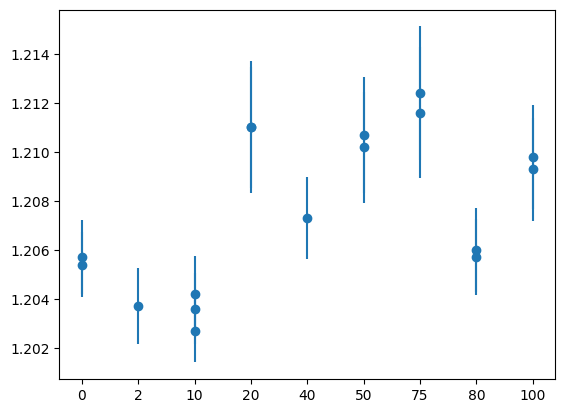

In [18]:
# Create Scatterplot with errorbars
plt.errorbar(x=df_ratios['Air Saturation'], y=df_ratios['Intensity Ratio'], yerr=df_ratios['Std'], fmt='o')


# Set X-axis limits
#plt.ylim(ymin=1, ymax=2.5)
plt.show()

In [ ]:
#Save the DataFrame as a CSV file
df_ratios.to_csv('C:/Users/au519867/OneDrive - Aarhus universitet/Skrivebord/Raw_Images/RAW_Stacks/Intensity_Ratio/ratio_data.csv',header=True, index=False, decimal=',')